<a href="https://colab.research.google.com/github/jinkijack/dataset-naivebayes-positivines/blob/main/naivebayes_positivines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Substitua com o caminho real do seu arquivo CSV
csv_file_path = 'https://raw.githubusercontent.com/jinkijack/dataset-naivebayes-positivines/main/data_train.csv'

# Carregar os dados
df = pd.read_csv(csv_file_path)

# Separar os dados e rótulos
texts = df['review']
labels = df['positive']

# Dividir os dados em treinamento e teste
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=0)

# Vetorização dos textos
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

# Treinar o modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train, labels_train)

# Avaliar o modelo
predictions = model.predict(X_test)
accuracy = accuracy_score(labels_test, predictions)
report = classification_report(labels_test, predictions)

accuracy, report

(0.847708625175105,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.88      0.85      2505\n           1       0.87      0.81      0.84      2492\n\n    accuracy                           0.85      4997\n   macro avg       0.85      0.85      0.85      4997\nweighted avg       0.85      0.85      0.85      4997\n')

In [13]:
accuracy

0.847708625175105

In [14]:
report

'              precision    recall  f1-score   support\n\n           0       0.83      0.88      0.85      2505\n           1       0.87      0.81      0.84      2492\n\n    accuracy                           0.85      4997\n   macro avg       0.85      0.85      0.85      4997\nweighted avg       0.85      0.85      0.85      4997\n'

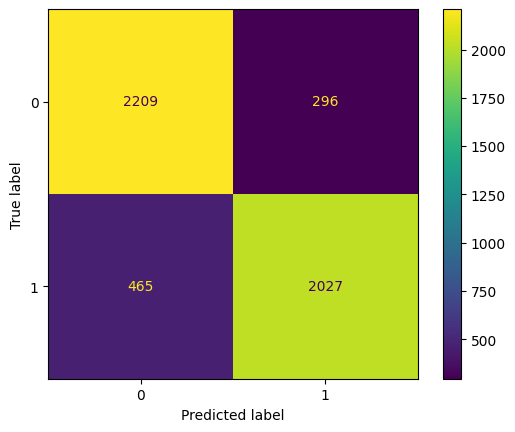

In [12]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, labels_test, display_labels=model.classes_)

In [2]:
# Exemplo de nova frase para avaliação
new_text = ["I hate the movie"]

# Transformar a nova frase usando o mesmo vetorizador
new_text_vectorized = vectorizer.transform(new_text)

# Usar o modelo para fazer a previsão
predicted_label = model.predict(new_text_vectorized)

# Convertendo a previsão de volta para rótulos legíveis (0 para negativo, 1 para positivo)
predicted_sentiment = 'positivo' if predicted_label[0] == 1 else 'negativo'

predicted_sentiment  # Mostrar a previsão

'negativo'

In [3]:
# Exemplo de nova frase para avaliação
new_text = ["I liked the movie"]

# Transformar a nova frase usando o mesmo vetorizador
new_text_vectorized = vectorizer.transform(new_text)

# Usar o modelo para fazer a previsão
predicted_label = model.predict(new_text_vectorized)

# Convertendo a previsão de volta para rótulos legíveis (0 para negativo, 1 para positivo)
predicted_sentiment = 'positivo' if predicted_label[0] == 1 else 'negativo'

predicted_sentiment  # Mostrar a previsão

'positivo'